In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Velocity model simulation
def CVM(Tmax,beta,sigma,v0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    V = n*[0]
    V[0] = v0 # set the initial value if you want to start with a different value rather than 0
    dW = (np.random.randn(n)+ 1j*np.random.randn(n))  *np.sqrt(dt) 
    for i in range(1,n):
        V[i] = V[i-1] - beta*V[i-1] * dt  + sigma *dW[i]
    Z = np.cumsum(V)* dt
    return Z

In [3]:
n= CVM(10000,1,1,0,0.1)

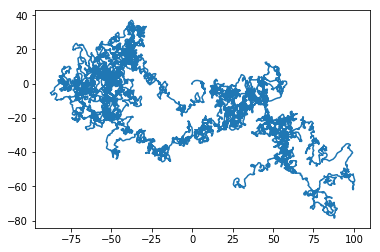

In [4]:
plt.plot(n.real,n.imag)
plt.show()

In [5]:
# Simulate the velocity model multiple times
# We look at lags 0,...,100
matrix_1 = np.zeros((2000000,100))
for i in range(0,2000000):
    n = CVM(110,1,1,0,0.01).real
    matrix_1[i,:] = np.array(n[::100][10:110]) * np.array(n[::100][10])  
    # put the numerical covariance on the same scale as the theoretical covariance

In [15]:
np.savetxt('velocity_model_covariance_numerical_matrix',matrix_1)

In [7]:
E_XY = matrix_1.mean(axis=0)
# We assume the mean of the process is 0

In [8]:
# Calculate the theoretical covariance
sigma = 1
a = 1 
s= 10
t = np.array(range(10,110))
theor_cov = np.zeros(len(t))
gamma= np.zeros(len(t))
for i in range(0,len(t)):
    gamma[i] = min(t[i],s) 

In [9]:
theor_cov= (0.5*sigma**2/a**3)*(2*np.exp(-a*gamma) - np.exp(-a*(t+gamma)) - np.exp(-a*np.abs(t-gamma)) + 2* np.exp(-a*t) +2*a*gamma -2)

In [10]:
# the only terms that make a difference are - np.exp(-a*np.abs(t-gamma))  and +2*a*gamma -2

In [11]:
matrix_1.mean(axis=0)

array([8.51058495, 8.82437243, 8.9385058 , 8.97865115, 8.99220025,
       8.99881195, 9.00166176, 9.0032414 , 9.00458455, 9.00307318,
       9.00259443, 9.00181592, 9.0009301 , 9.0002897 , 9.00082768,
       8.99835519, 8.99730039, 8.99772261, 8.99641184, 8.99668799,
       8.99921891, 9.00232163, 9.0035271 , 9.00449909, 9.0046866 ,
       9.00437972, 9.00521295, 9.00717528, 9.00827442, 9.00870458,
       9.00933921, 9.00882307, 9.00630032, 9.00501104, 9.00373454,
       9.00335485, 9.00340328, 9.0037621 , 9.00126546, 8.99893789,
       8.9972421 , 8.99534926, 8.99483578, 8.99446897, 8.9937833 ,
       8.99261375, 8.9928919 , 8.99214054, 8.99070994, 8.98842995,
       8.98820236, 8.98830788, 8.98791023, 8.98776779, 8.98754687,
       8.98549146, 8.98434858, 8.98299324, 8.98283375, 8.98210018,
       8.98217678, 8.98363987, 8.98304999, 8.98200047, 8.98214934,
       8.98262756, 8.98332054, 8.98337952, 8.98432029, 8.98668505,
       8.98773974, 8.99093142, 8.99338479, 8.99429636, 8.99241

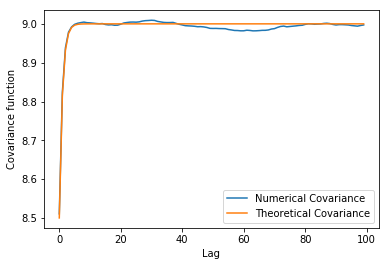

In [12]:
plt.plot(matrix_1.mean(axis=0),label="Numerical Covariance")
plt.plot(theor_cov ,label='Theoretical Covariance' )
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()

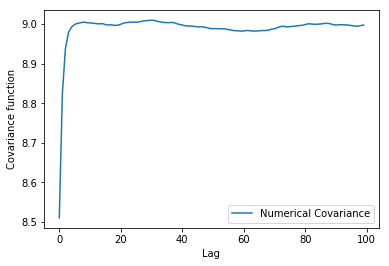

In [18]:
plt.plot(matrix_1.mean(axis=0),label="Numerical Covariance")
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()

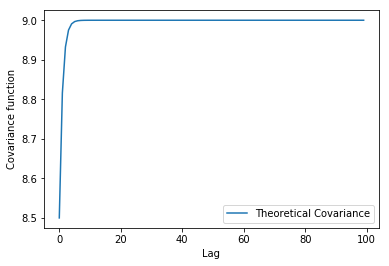

In [19]:
plt.plot(theor_cov ,label='Theoretical Covariance' )
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()

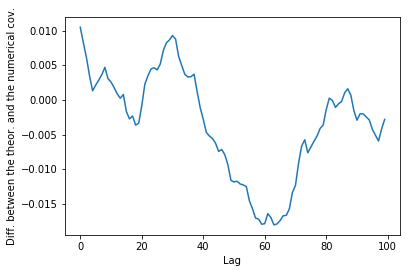

In [22]:
plt.plot(matrix_1.mean(axis=0)- theor_cov)
plt.xlabel('Lag')
plt.ylabel('Diff. between the theor. and the numerical cov.')
plt.show()


In [14]:
#Observation:it needs a very large of simulations to get a very smooth versions. The difference is very tiny, the theoretical
# covariance needs to be a little bit higher.
# the key was to have a very large number of simulations to make it very smooth and to have a lower dt, dt= 0.1 doesn't work